<a href="https://colab.research.google.com/github/Marcelooyola/UDAMod5/blob/main/trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 5 - Aprendizaje Automático - Machine Learning**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

~~~
Nombre: Marcelo
Apellido: Oyola
~~~

# **Aclaraciones previas**



*   En cada celda se indica lo solicitado.
*   Se pueden generar la cantidad de scripts necesarios.
*   Puede explicar insertando celdas de texto.
*   Para graficar se puede utilizar cualquier librería.
*   Al finalizar, descargar el archivo y entregarlo por el campus.
*   Al finalizar se debería borrar esta celda.


age: edad del cliente, valor numérico entero mayor a 18.
job: trabajo del cliente.
marital: estado civil del cliente.
education: educación alcanzada por el cliente.
default: si el cliente posee deudas.
balance: depósito del cliente en euros.
housing: propietario de inmueble o alquila.
loan: si el cliente tiene un préstamo.
contact: último contacto del cliente.
day: día del último contacto del cliente.
month: mes del último contacto el cliente.
duration: duración del último contacto del cliente.
campaign: identificación de la campaña.
pdays: dias posteriores a la campaña.
previous: números de contactos previos a la campaña.
poutcome: resultados de la campaña anterior.
y: si suscribe un depósito a plazo posterior a campaña.

# **Carga de módulos y datos necesarios**

In [2]:
import pandas as pd
import numpy as np

In [76]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# **Creación del DataFrame**

In [4]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/main/Gestion_y_Procesamiento_BD/"
archivo="bank-full.csv"
analisis = pd.read_csv(url+archivo)
analisis.replace({"unknown": np.nan}, inplace=True)

# **Análisis Exploratorio de los datos**

## Visualización del conjunto de datos

In [5]:
analisis.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


## Tipos de datos

In [6]:
"""
age: edad del cliente, valor numérico entero mayor a 18.
job: trabajo del cliente.
marital: estado civil del cliente.
education: educación alcanzada por el cliente.
default: si el cliente posee deudas.
balance: depósito del cliente en euros.
housing: propietario de inmueble o alquila.
loan: si el cliente tiene un préstamo.
contact: último contacto del cliente.
day: día del último contacto del cliente.
month: mes del último contacto el cliente.
duration: duración del último contacto del cliente.
campaign: identificación de la campaña.
pdays: dias posteriores a la campaña.
previous: números de contactos previos a la campaña.
poutcome: resultados de la campaña anterior.
y: si suscribe un depósito a plazo posterior a campaña.
"""

'\nage: edad del cliente, valor numérico entero mayor a 18.\njob: trabajo del cliente.\nmarital: estado civil del cliente.\neducation: educación alcanzada por el cliente.\ndefault: si el cliente posee deudas.\nbalance: depósito del cliente en euros.\nhousing: propietario de inmueble o alquila.\nloan: si el cliente tiene un préstamo.\ncontact: último contacto del cliente.\nday: día del último contacto del cliente.\nmonth: mes del último contacto el cliente.\nduration: duración del último contacto del cliente.\ncampaign: identificación de la campaña.\npdays: dias posteriores a la campaña.\nprevious: números de contactos previos a la campaña.\npoutcome: resultados de la campaña anterior.\ny: si suscribe un depósito a plazo posterior a campaña.\n'

In [7]:
analisis.columns = ['edad','trabajo', 'estado_civil','educacion','deuda','deposito_cliente','propietario_inmueble',
                    'prestamo_actual', 'ultima_comunicacion','dia','mes','duracion','campaña','dias_posteriores','dias_previos',
                    'resultado_anterior','deposito']

In [8]:
analisis.dtypes

edad                     int64
trabajo                 object
estado_civil            object
educacion               object
deuda                   object
deposito_cliente         int64
propietario_inmueble    object
prestamo_actual         object
ultima_comunicacion     object
dia                      int64
mes                     object
duracion                 int64
campaña                  int64
dias_posteriores         int64
dias_previos             int64
resultado_anterior      object
deposito                object
dtype: object

In [9]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  45211 non-null  int64 
 1   trabajo               44923 non-null  object
 2   estado_civil          45211 non-null  object
 3   educacion             43354 non-null  object
 4   deuda                 45211 non-null  object
 5   deposito_cliente      45211 non-null  int64 
 6   propietario_inmueble  45211 non-null  object
 7   prestamo_actual       45211 non-null  object
 8   ultima_comunicacion   32191 non-null  object
 9   dia                   45211 non-null  int64 
 10  mes                   45211 non-null  object
 11  duracion              45211 non-null  int64 
 12  campaña               45211 non-null  int64 
 13  dias_posteriores      45211 non-null  int64 
 14  dias_previos          45211 non-null  int64 
 15  resultado_anterior    8252 non-null 

## Dimensión del conjunto de datos y valores nulos y faltantes

In [10]:
#Dimesion del conjunto de datos
dimension = analisis.shape
print(f'Dimension del conjunto de datos: \n Filas: {dimension[0]} \n Columnas: {dimension[1]}')

Dimension del conjunto de datos: 
 Filas: 45211 
 Columnas: 17


In [11]:
valor_null = analisis.isnull()
valor_null_xcol = valor_null.sum().sort_values(ascending= False)

print (f'Valores nulos por columna: \n {valor_null_xcol}')

Valores nulos por columna: 
 resultado_anterior      36959
ultima_comunicacion     13020
educacion                1857
trabajo                   288
mes                         0
dias_previos                0
dias_posteriores            0
campaña                     0
duracion                    0
edad                        0
dia                         0
prestamo_actual             0
propietario_inmueble        0
deposito_cliente            0
deuda                       0
estado_civil                0
deposito                    0
dtype: int64


In [12]:
print(f'Numero de filas duplicadas: {analisis.duplicated().sum()}')

Numero de filas duplicadas: 0


## Variable Objetivo

In [13]:
#variable objetivo = definir si el cliente accede a realizar un deposito bancario
analisis['deposito'].value_counts()

no     39922
yes     5289
Name: deposito, dtype: int64

In [14]:
fig = px.histogram( analisis,
                   x = 'deposito',
                    color= 'deposito',
                    title = 'Decision de depositos bancarios',
                    template = 'presentation'
)
fig.show()

## Variables numéricas, análisis descriptivo

In [15]:
analisis_numerico = analisis.select_dtypes(include= 'int64')
analisis_numerico

,edad,deposito_cliente,dia,duracion,campaña,dias_posteriores,dias_previos
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [16]:
round(analisis_numerico.describe(),2)

,edad,deposito_cliente,dia,duracion,campaña,dias_posteriores,dias_previos
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [17]:
fig = px.histogram( analisis_numerico,
                   x = 'edad',
                  template = 'presentation',
                    nbins= 10,
                    opacity=0.7,
                    marginal = 'box',
                    title = 'Distribucion edad de los clientes',
                    )
fig.update_layout(
    bargap=0.2,
    xaxis_title = 'Edades',
    yaxis_title= 'Cantidad'
    )
fig.show()

In [18]:
analisis.edad.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: edad, Length: 77, dtype: int64

In [19]:
edad_unique = np.sort(analisis['edad'].unique())
edad_unique


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95])

In [20]:
print(f'La cantidad de edades distintas que hay son: {analisis.edad.nunique()}')

La cantidad de edades distintas que hay son: 77


## Otras variables, análisis descriptivo

In [21]:
analisis_descriptivo = analisis.select_dtypes('object')
analisis_descriptivo.head()

,trabajo,estado_civil,educacion,deuda,propietario_inmueble,prestamo_actual,ultima_comunicacion,mes,resultado_anterior,deposito
0,management,married,tertiary,no,yes,no,NaN,may,NaN,no
1,technician,single,secondary,no,yes,no,NaN,may,NaN,no
2,entrepreneur,married,secondary,no,yes,yes,NaN,may,NaN,no
3,blue-collar,married,NaN,no,yes,no,NaN,may,NaN,no
4,NaN,single,NaN,no,no,no,NaN,may,NaN,no


In [22]:
round(analisis_descriptivo.describe(),2)

,trabajo,estado_civil,educacion,deuda,propietario_inmueble,prestamo_actual,ultima_comunicacion,mes,resultado_anterior,deposito
count,44923,45211,43354,45211,45211,45211,32191,45211,8252,45211
unique,11,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901,39922


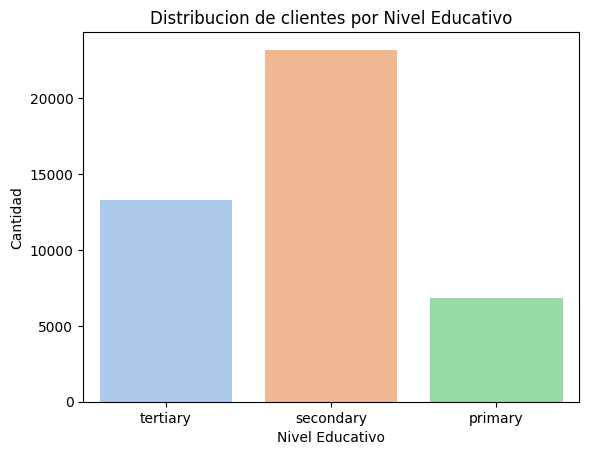

In [23]:
sns.countplot(
    x = analisis_descriptivo['educacion'],
    palette = 'pastel',
)

plt.ylabel('Cantidad')
plt.xlabel('Nivel Educativo')
plt.title('Distribucion de clientes por Nivel Educativo')
plt.show()


In [24]:
analisis_descriptivo.educacion.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [25]:
analisis_descriptivo.educacion.nunique()

3

## Correlación de variables

In [26]:
pearson = round(analisis.corr(method = 'pearson', numeric_only = True),3)
pearson

,edad,deposito_cliente,dia,duracion,campaña,dias_posteriores,dias_previos
edad,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
deposito_cliente,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
dia,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duracion,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaña,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
dias_posteriores,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
dias_previos,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


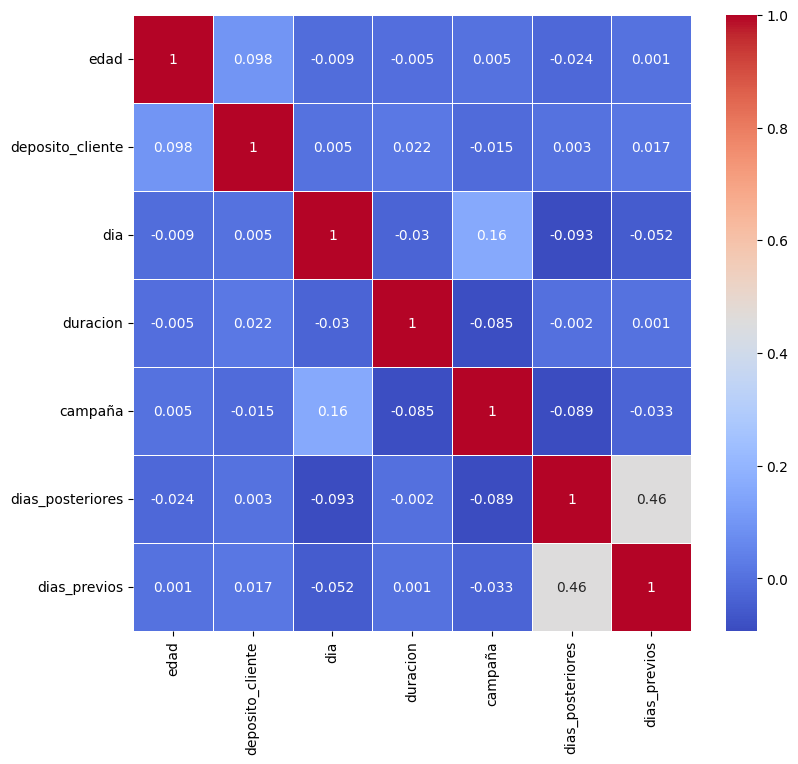

In [27]:
plt.figure(figsize= (9,8))
sns.heatmap(
    pearson,
    annot = True,
    linewidths = 0.5,
    cmap = 'coolwarm'
)
plt.show()

In [28]:
orden = pearson.unstack()
print(orden)

edad              edad                1.000
                  deposito_cliente    0.098
                  dia                -0.009
                  duracion           -0.005
                  campaña             0.005
                  dias_posteriores   -0.024
                  dias_previos        0.001
deposito_cliente  edad                0.098
                  deposito_cliente    1.000
                  dia                 0.005
                  duracion            0.022
                  campaña            -0.015
                  dias_posteriores    0.003
                  dias_previos        0.017
dia               edad               -0.009
                  deposito_cliente    0.005
                  dia                 1.000
                  duracion           -0.030
                  campaña             0.162
                  dias_posteriores   -0.093
                  dias_previos       -0.052
duracion          edad               -0.005
                  deposito_clien

In [29]:
orden.sort_values()

dia               dias_posteriores   -0.093
dias_posteriores  dia                -0.093
                  campaña            -0.089
campaña           dias_posteriores   -0.089
duracion          campaña            -0.085
campaña           duracion           -0.085
dia               dias_previos       -0.052
dias_previos      dia                -0.052
                  campaña            -0.033
campaña           dias_previos       -0.033
duracion          dia                -0.030
dia               duracion           -0.030
edad              dias_posteriores   -0.024
dias_posteriores  edad               -0.024
campaña           deposito_cliente   -0.015
deposito_cliente  campaña            -0.015
edad              dia                -0.009
dia               edad               -0.009
edad              duracion           -0.005
duracion          edad               -0.005
dias_posteriores  duracion           -0.002
duracion          dias_posteriores   -0.002
                  dias_previos  

In [30]:
negativos = orden[orden < 0]
negativos

edad              dia                -0.009
                  duracion           -0.005
                  dias_posteriores   -0.024
deposito_cliente  campaña            -0.015
dia               edad               -0.009
                  duracion           -0.030
                  dias_posteriores   -0.093
                  dias_previos       -0.052
duracion          edad               -0.005
                  dia                -0.030
                  campaña            -0.085
                  dias_posteriores   -0.002
campaña           deposito_cliente   -0.015
                  duracion           -0.085
                  dias_posteriores   -0.089
                  dias_previos       -0.033
dias_posteriores  edad               -0.024
                  dia                -0.093
                  duracion           -0.002
                  campaña            -0.089
dias_previos      dia                -0.052
                  campaña            -0.033
dtype: float64

## Graficos de variables

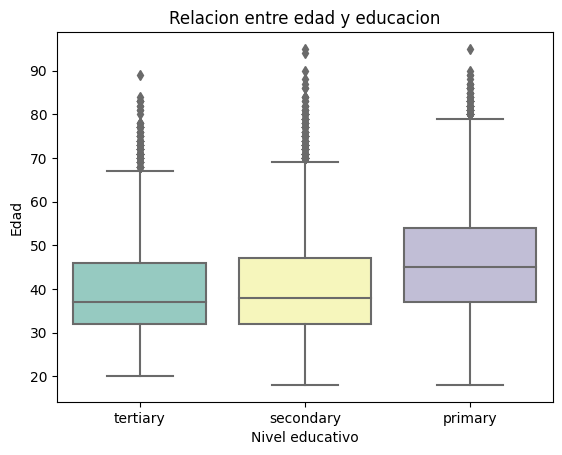

In [31]:
sns.boxplot(
    data = analisis,
    y = 'edad',
    x = 'educacion',
    palette = 'Set3'
)

plt.title('Relacion entre edad y educacion')
plt.xlabel('Nivel educativo')
plt.ylabel('Edad')
plt.show()

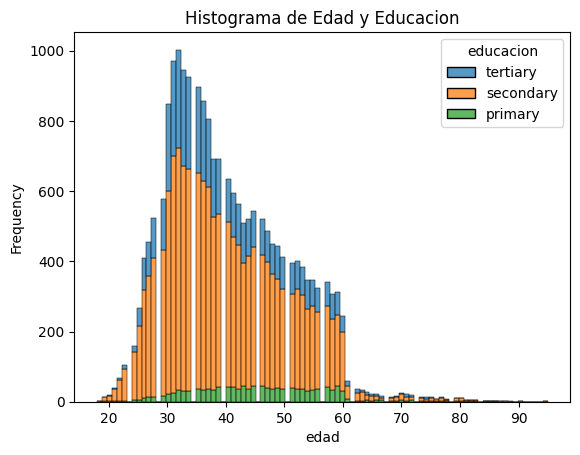

In [32]:
sns.histplot(
    data = analisis,
    x = 'edad',
    stat = 'frequency',
    shrink = 1,
    hue = 'educacion',
    multiple = 'stack'
)
plt.title('Histograma de Edad y Educacion')
plt.show()


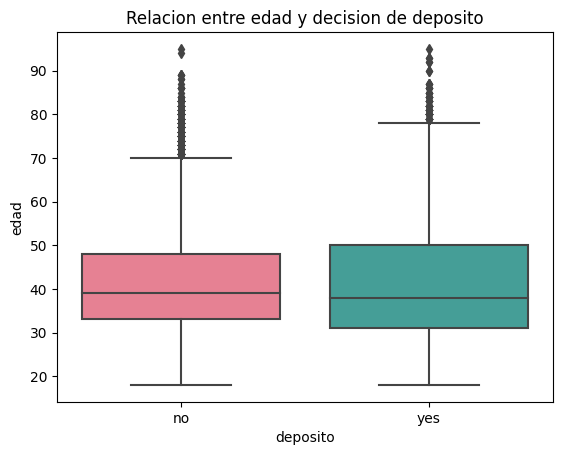

In [33]:
sns.boxplot(
    data = analisis,
    y = 'edad',
    x = 'deposito',
    palette = 'husl'
)
plt.title('Relacion entre edad y decision de deposito')
plt.show()

In [34]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  45211 non-null  int64 
 1   trabajo               44923 non-null  object
 2   estado_civil          45211 non-null  object
 3   educacion             43354 non-null  object
 4   deuda                 45211 non-null  object
 5   deposito_cliente      45211 non-null  int64 
 6   propietario_inmueble  45211 non-null  object
 7   prestamo_actual       45211 non-null  object
 8   ultima_comunicacion   32191 non-null  object
 9   dia                   45211 non-null  int64 
 10  mes                   45211 non-null  object
 11  duracion              45211 non-null  int64 
 12  campaña               45211 non-null  int64 
 13  dias_posteriores      45211 non-null  int64 
 14  dias_previos          45211 non-null  int64 
 15  resultado_anterior    8252 non-null 

In [35]:
px.scatter(
    analisis,
    x = 'deposito_cliente',
    y = 'edad',
    color = 'deposito',
    template = 'gridon',
    title = '$Depositado vs Edad'
)


# **División del conjunto de datos**

In [36]:
y = analisis['deposito'] #se define variable objetivo
X = analisis.drop(columns=['deposito']) #se define conjunto de analisis

In [37]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: deposito, Length: 45211, dtype: object

In [38]:
X

,edad,trabajo,estado_civil,educacion,deuda,deposito_cliente,propietario_inmueble,prestamo_actual,ultima_comunicacion,dia,mes,duracion,campaña,dias_posteriores,dias_previos,resultado_anterior
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [40]:
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(31647, 16)
(13564, 16)
(31647,)
(13564,)


# **Preprocesamiento**

## Codificación de variables no numéricas

In [43]:
analisis.isnull().sum().sort_values(ascending = False)

resultado_anterior      36959
ultima_comunicacion     13020
educacion                1857
trabajo                   288
mes                         0
dias_previos                0
dias_posteriores            0
campaña                     0
duracion                    0
edad                        0
dia                         0
prestamo_actual             0
propietario_inmueble        0
deposito_cliente            0
deuda                       0
estado_civil                0
deposito                    0
dtype: int64

In [41]:
analisis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  45211 non-null  int64 
 1   trabajo               44923 non-null  object
 2   estado_civil          45211 non-null  object
 3   educacion             43354 non-null  object
 4   deuda                 45211 non-null  object
 5   deposito_cliente      45211 non-null  int64 
 6   propietario_inmueble  45211 non-null  object
 7   prestamo_actual       45211 non-null  object
 8   ultima_comunicacion   32191 non-null  object
 9   dia                   45211 non-null  int64 
 10  mes                   45211 non-null  object
 11  duracion              45211 non-null  int64 
 12  campaña               45211 non-null  int64 
 13  dias_posteriores      45211 non-null  int64 
 14  dias_previos          45211 non-null  int64 
 15  resultado_anterior    8252 non-null 

In [69]:
analisis.edad.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [68]:
analisis.trabajo.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [67]:
analisis.estado_civil.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [66]:
analisis.educacion.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [65]:
analisis.deuda.unique()

array(['no', 'yes'], dtype=object)

In [64]:
analisis.deposito_cliente.unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [63]:
analisis.propietario_inmueble.unique()

array(['yes', 'no'], dtype=object)

In [62]:
analisis.prestamo_actual.unique()

array(['no', 'yes'], dtype=object)

In [61]:
analisis.ultima_comunicacion.unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [60]:
analisis.dia.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [59]:
analisis.mes.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [58]:
analisis.duracion.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [57]:
analisis.campaña.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [56]:
analisis.dias_posteriores.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [55]:
analisis.dias_previos.unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [54]:
analisis.resultado_anterior.unique()

array([nan, 'failure', 'other', 'success'], dtype=object)

In [53]:
analisis.deposito.unique()

array(['no', 'yes'], dtype=object)

In [74]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  45211 non-null  int64 
 1   trabajo               44923 non-null  object
 2   estado_civil          45211 non-null  object
 3   educacion             43354 non-null  object
 4   deuda                 45211 non-null  object
 5   deposito_cliente      45211 non-null  int64 
 6   propietario_inmueble  45211 non-null  object
 7   prestamo_actual       45211 non-null  object
 8   ultima_comunicacion   32191 non-null  object
 9   dia                   45211 non-null  int64 
 10  mes                   45211 non-null  object
 11  duracion              45211 non-null  int64 
 12  campaña               45211 non-null  int64 
 13  dias_posteriores      45211 non-null  int64 
 14  dias_previos          45211 non-null  int64 
 15  resultado_anterior    8252 non-null 

In [83]:
analisis.replace({"nan": None}, inplace=True)

In [77]:
convertir = LabelEncoder()

In [78]:
analisis.trabajo = analisis.trabajo.apply(str)
analisis.estado_civil = analisis.estado_civil.apply(str)
analisis.educacion = analisis.educacion.apply(str)
analisis.deuda = analisis.deuda.apply(str)
analisis.propietario_inmueble = analisis.propietario_inmueble.apply(str)
analisis.prestamo_actual = analisis.prestamo_actual.apply(str)
analisis.ultima_comunicacion = analisis.ultima_comunicacion.apply(str)
analisis.mes = analisis.mes.apply(str)
analisis.resultado_anterior = analisis.resultado_anterior.apply(str)
analisis.deposito = analisis.deposito.apply(str)

In [79]:
analisis.insert(2,column="num_trabajo",value=convertir.fit_transform(analisis.trabajo))
analisis.insert(4,column="num_estado_civil",value=convertir.fit_transform(analisis.estado_civil))
analisis.insert(6,column="num_educacion",value=convertir.fit_transform(analisis.educacion))
analisis.insert(8,column="num_deuda",value=convertir.fit_transform(analisis.deuda))
analisis.insert(11,column="num_propietario_inm",value=convertir.fit_transform(analisis.propietario_inmueble))
analisis.insert(13,column="num_prestamo_act",value=convertir.fit_transform(analisis.prestamo_actual))
analisis.insert(15,column="num_ultimo_contacto",value=convertir.fit_transform(analisis.ultima_comunicacion))
analisis.insert(23,column="num_resultado_ant",value=convertir.fit_transform(analisis.resultado_anterior))
analisis.insert(25,column="num_deposito",value=convertir.fit_transform(analisis.deposito))

In [84]:
analisis.head()

,edad,trabajo,num_trabajo,estado_civil,num_estado_civil,educacion,num_educacion,deuda,num_deuda,deposito_cliente,...,dia,mes,duracion,campaña,dias_posteriores,dias_previos,resultado_anterior,num_resultado_ant,deposito,num_deposito
0,58,management,4,married,1,tertiary,3,no,0,2143,...,5,may,261,1,-1,0,None,1,no,0
1,44,technician,10,single,2,secondary,2,no,0,29,...,5,may,151,1,-1,0,None,1,no,0
2,33,entrepreneur,2,married,1,secondary,2,no,0,2,...,5,may,76,1,-1,0,None,1,no,0
3,47,blue-collar,1,married,1,None,0,no,0,1506,...,5,may,92,1,-1,0,None,1,no,0
4,33,None,5,single,2,None,0,no,0,1,...,5,may,198,1,-1,0,None,1,no,0


In [82]:
analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   edad                  45211 non-null  int64 
 1   trabajo               45211 non-null  object
 2   num_trabajo           45211 non-null  int64 
 3   estado_civil          45211 non-null  object
 4   num_estado_civil      45211 non-null  int64 
 5   educacion             45211 non-null  object
 6   num_educacion         45211 non-null  int64 
 7   deuda                 45211 non-null  object
 8   num_deuda             45211 non-null  int64 
 9   deposito_cliente      45211 non-null  int64 
 10  propietario_inmueble  45211 non-null  object
 11  num_propietario_inm   45211 non-null  int64 
 12  prestamo_actual       45211 non-null  object
 13  num_prestamo_act      45211 non-null  int64 
 14  ultima_comunicacion   45211 non-null  object
 15  num_ultimo_contacto   45211 non-null

### Variable Mes

In [81]:
analisis.mes.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [87]:
def mes_numerico(mes):
  if mes == "jan":
    return int("1")
  elif mes == "feb":
    return int("2")
  elif mes == "mar":
    return int("3")
  elif mes == "apr":
    return int("4")
  elif mes == "may":
    return int("5")
  elif mes == "jun":
    return int("6")
  elif mes == "jul":
    return int("7")
  elif mes == "aug":
    return int("8")
  elif mes == "sep":
    return int("9")
  elif mes == "oct":
    return int("10")
  elif mes == "nov":
    return int("11")
  else:
    return int("12")

In [88]:
analisis.mes = analisis.mes.apply(mes_numerico)

In [89]:
analisis.mes.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

## Imputación de valores faltantes